# Backpropagation model implementation using Numpy

In [2]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize network parameters (weights, biases)
weights = {
    "w1": 0.15, "w2": 0.20, "w3": 0.25, "w4": 0.30,
    "w5": 0.40, "w6": 0.45, "w7": 0.50, "w8": 0.55
}
biases = {"b1": 0.35, "b2": 0.60}

# Inputs and target outputs
inputs = np.array([0.05, 0.10])
targets = np.array([0.01, 0.99])

# Learning rate
eta = 0.1

# Training for 100 epochs
epochs = 100
errors = []

# Training loop
for epoch in range(epochs):
    # Feedforward
    net_h1 = inputs[0] * weights["w1"] + inputs[1] * weights["w3"] + biases["b1"]
    net_h2 = inputs[0] * weights["w2"] + inputs[1] * weights["w4"] + biases["b1"]
    h1 = sigmoid(net_h1)
    h2 = sigmoid(net_h2)
    
    net_o1 = h1 * weights["w5"] + h2 * weights["w7"] + biases["b2"]
    net_o2 = h1 * weights["w6"] + h2 * weights["w8"] + biases["b2"]
    o1 = sigmoid(net_o1)
    o2 = sigmoid(net_o2)
    
    # Calculate output error
    error_o1 = 0.5 * (targets[0] - o1) ** 2
    error_o2 = 0.5 * (targets[1] - o2) ** 2
    total_error = error_o1 + error_o2
    errors.append(total_error)
    
    # Backpropagation
    delta_o1 = (o1 - targets[0]) * sigmoid_derivative(o1)
    delta_o2 = (o2 - targets[1]) * sigmoid_derivative(o2)
    delta_h1 = (delta_o1 * weights["w5"] + delta_o2 * weights["w6"]) * sigmoid_derivative(h1)
    delta_h2 = (delta_o1 * weights["w7"] + delta_o2 * weights["w8"]) * sigmoid_derivative(h2)
    
    # Update weights and biases
    weights["w5"] -= eta * delta_o1 * h1
    weights["w6"] -= eta * delta_o2 * h1
    weights["w7"] -= eta * delta_o1 * h2
    weights["w8"] -= eta * delta_o2 * h2
    
    weights["w1"] -= eta * delta_h1 * inputs[0]
    weights["w2"] -= eta * delta_h2 * inputs[0]
    weights["w3"] -= eta * delta_h1 * inputs[1]
    weights["w4"] -= eta * delta_h2 * inputs[1]
    
    biases["b1"] -= eta * (delta_h1 + delta_h2)
    biases["b2"] -= eta * (delta_o1 + delta_o2)
    
    # Print the results for each epoch
    print(f"Epoch {epoch + 1}, Error: {total_error}")

# Final error after 100 epochs
total_error, errors[-1]

Epoch 1, Error: 0.303658313630144
Epoch 2, Error: 0.30120599344413435
Epoch 3, Error: 0.2987357690431853
Epoch 4, Error: 0.29624857378945335
Epoch 5, Error: 0.2937453821899355
Epoch 6, Error: 0.2912272083144022
Epoch 7, Error: 0.2886951039825952
Epoch 8, Error: 0.28615015672324406
Epoch 9, Error: 0.28359348750966396
Epoch 10, Error: 0.28102624827896133
Epoch 11, Error: 0.2784496192441753
Epoch 12, Error: 0.2758648060109659
Epoch 13, Error: 0.2732730365127208
Epoch 14, Error: 0.27067555778011937
Epoch 15, Error: 0.26807363256325856
Epoch 16, Error: 0.2654685358263509
Epoch 17, Error: 0.26286155113672677
Epoch 18, Error: 0.26025396697137504
Epoch 19, Error: 0.2576470729655017
Epoch 20, Error: 0.2550421561285599
Epoch 21, Error: 0.25244049705387334
Epoch 22, Error: 0.2498433661483297
Epoch 23, Error: 0.24725201990864357
Epoch 24, Error: 0.24466769727038773
Epoch 25, Error: 0.24209161605534762
Epoch 26, Error: 0.23952496954180316
Epoch 27, Error: 0.23696892318107057
Epoch 28, Error: 0.2344

(np.float64(0.10765017235664395), np.float64(0.10765017235664395))

# Backpropagation model implementation using tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
history = model.fit(
      inputs,
      targets,
      epochs=100,
      verbose=0,
      callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ]
)
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential([
    Dense(2, input_dim=2, activation='sigmoid', use_bias=True,
          kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
          bias_initializer=tf.constant_initializer(0.35)),
    Dense(2, activation='sigmoid', use_bias=True,
          kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
          bias_initializer=tf.constant_initializer(0.60))
])

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0)

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)

Epoch 1, Loss: 0.05528151988983154
Epoch 2, Loss: 0.05452102795243263
Epoch 3, Loss: 0.05377744138240814
Epoch 4, Loss: 0.05305030196905136
Epoch 5, Loss: 0.05233915522694588
Epoch 6, Loss: 0.05164354667067528
Epoch 7, Loss: 0.05096304416656494
Epoch 8, Loss: 0.05029725283384323
Epoch 9, Loss: 0.049645744264125824
Epoch 10, Loss: 0.04900813102722168
Epoch 11, Loss: 0.04838402941823006
Epoch 12, Loss: 0.0477730818092823
Epoch 13, Loss: 0.04717491939663887
Epoch 14, Loss: 0.0465892069041729
Epoch 15, Loss: 0.04601559787988663
Epoch 16, Loss: 0.04545377939939499
Epoch 17, Loss: 0.044903434813022614
Epoch 18, Loss: 0.044364240020513535
Epoch 19, Loss: 0.04383591562509537
Epoch 20, Loss: 0.04331815987825394
Epoch 21, Loss: 0.04281069338321686
Epoch 22, Loss: 0.042313288897275925
Epoch 23, Loss: 0.041825633496046066
Epoch 24, Loss: 0.04134746640920639
Epoch 25, Loss: 0.04087859019637108
Epoch 26, Loss: 0.040418751537799835
Epoch 27, Loss: 0.03996769338846207
Epoch 28, Loss: 0.039525218307971

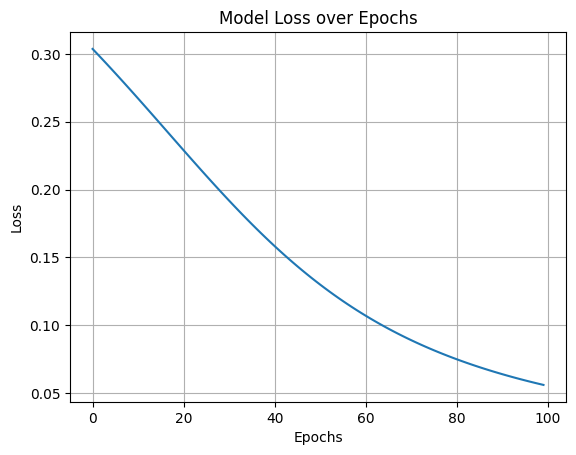

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [10]:
# Making a prediction with the trained model
sample_input = np.array([[0.05, 0.10]])  # New sample input for prediction

# Make the prediction
prediction = model.predict(sample_input)

# Output the prediction
print(f"Prediction for input {sample_input}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for input [[0.05 0.1 ]]: [[0.3077904 0.8420679]]


In [8]:
# Making a prediction with the trained model
sample_input = np.array([[0.02, 0.15]])  # New sample input for prediction

# Make the prediction
prediction = model.predict(sample_input)

# Output the prediction
print(f"Prediction for input {sample_input}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for input [[0.02 0.15]]: [[0.3075959 0.8424318]]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
history = model.fit(
      inputs,
      targets,
      epochs=100,
      verbose=0,
      callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ]
)
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential([
    Dense(2, input_dim=2, activation='sigmoid', use_bias=True,
          kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
          bias_initializer=tf.constant_initializer(0.35)),
    Dense(2, activation='sigmoid', use_bias=True,
          kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
          bias_initializer=tf.constant_initializer(0.60))
])

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0)

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)

Epoch 1, Loss: 0.05528151988983154
Epoch 2, Loss: 0.05452102795243263
Epoch 3, Loss: 0.05377744138240814
Epoch 4, Loss: 0.05305030196905136
Epoch 5, Loss: 0.05233915522694588
Epoch 6, Loss: 0.05164354667067528
Epoch 7, Loss: 0.05096304416656494
Epoch 8, Loss: 0.05029725283384323
Epoch 9, Loss: 0.049645744264125824
Epoch 10, Loss: 0.04900813102722168
Epoch 11, Loss: 0.04838402941823006
Epoch 12, Loss: 0.0477730818092823
Epoch 13, Loss: 0.04717491939663887
Epoch 14, Loss: 0.0465892069041729
Epoch 15, Loss: 0.04601559787988663
Epoch 16, Loss: 0.04545377939939499
Epoch 17, Loss: 0.044903434813022614
Epoch 18, Loss: 0.044364240020513535
Epoch 19, Loss: 0.04383591562509537
Epoch 20, Loss: 0.04331815987825394
Epoch 21, Loss: 0.04281069338321686
Epoch 22, Loss: 0.042313288897275925
Epoch 23, Loss: 0.041825633496046066
Epoch 24, Loss: 0.04134746640920639
Epoch 25, Loss: 0.04087859019637108
Epoch 26, Loss: 0.040418751537799835
Epoch 27, Loss: 0.03996769338846207
Epoch 28, Loss: 0.039525218307971

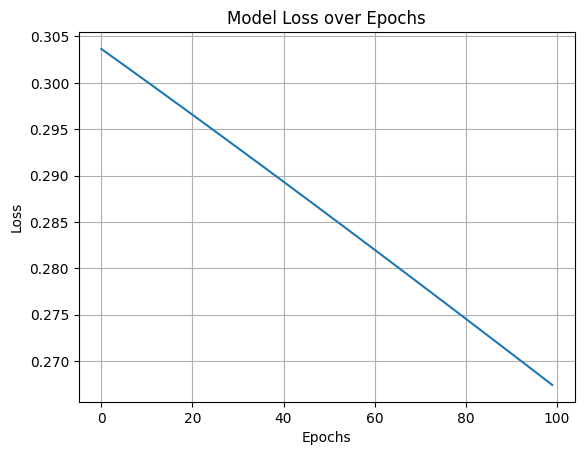

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [13]:
# Making a prediction with the trained model
sample_input = np.array([[0.05, 0.10]])  # New sample input for prediction

# Make the prediction
prediction = model.predict(sample_input)

# Output the prediction
print(f"Prediction for input {sample_input}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for input [[0.05 0.1 ]]: [[0.70956707 0.77867967]]


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential()

# First layer
model.add(Dense(2, input_dim=2, activation='relu', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
                bias_initializer=tf.constant_initializer(0.35)))

# Second layer
model.add(Dense(2, activation='relu', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
                bias_initializer=tf.constant_initializer(0.60)))

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0, callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ])

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)


Epoch 1, Loss: 0.43992772698402405
Epoch 2, Loss: 0.3056584894657135
Epoch 3, Loss: 0.22043226659297943
Epoch 4, Loss: 0.16301791369915009
Epoch 5, Loss: 0.1227094754576683
Epoch 6, Loss: 0.09355593472719193
Epoch 7, Loss: 0.07200230658054352
Epoch 8, Loss: 0.05580323934555054
Epoch 9, Loss: 0.043476302176713943
Epoch 10, Loss: 0.03400687128305435
Epoch 11, Loss: 0.02667989954352379
Epoch 12, Loss: 0.020979326218366623
Epoch 13, Loss: 0.01652536727488041
Epoch 14, Loss: 0.013034154660999775
Epoch 15, Loss: 0.010290805250406265
Epoch 16, Loss: 0.008131039328873158
Epoch 17, Loss: 0.006428252439945936
Epoch 18, Loss: 0.005084272939711809
Epoch 19, Loss: 0.004022602457553148
Epoch 20, Loss: 0.0031834072433412075
Epoch 21, Loss: 0.002519748406484723
Epoch 22, Loss: 0.0019947183318436146
Epoch 23, Loss: 0.0015792448539286852
Epoch 24, Loss: 0.0012504026526585221
Epoch 25, Loss: 0.0009900868171826005
Epoch 26, Loss: 0.0007839940953999758
Epoch 27, Loss: 0.0006208179984241724
Epoch 28, Loss: 

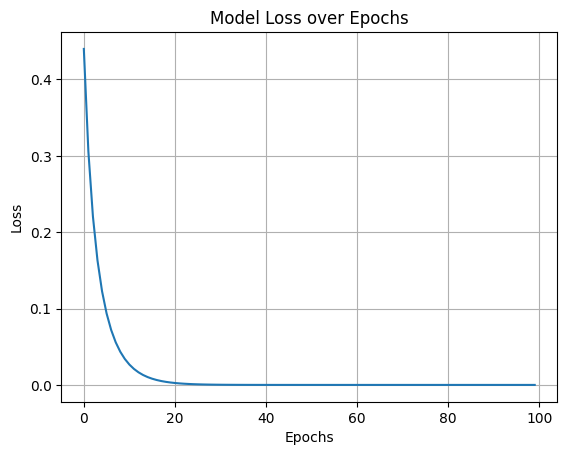

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [24]:
# Making a prediction with the trained model
sample_input = np.array([[0.05, 0.10]])  # New sample input for prediction

# Make the prediction
prediction = model.predict(sample_input)

# Output the prediction
print(f"Prediction for input {sample_input}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for input [[0.05 0.1 ]]: [[0.01000568 0.98999727]]


In [25]:
# Making a prediction with the trained model
sample_input = np.array([[0.02, 0.15]])  # New sample input for prediction

# Make the prediction
prediction = model.predict(sample_input)

# Output the prediction
print(f"Prediction for input {sample_input}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for input [[0.02 0.15]]: [[0.01405627 0.99856675]]


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential()

# First layer
model.add(Dense(2, input_dim=2, activation='leaky_relu', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
                bias_initializer=tf.constant_initializer(0.35)))

# Second layer
model.add(Dense(2, activation='leaky_relu', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
                bias_initializer=tf.constant_initializer(0.60)))

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0, callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ])

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)

Epoch 1, Loss: 0.43992772698402405
Epoch 2, Loss: 0.3056584894657135
Epoch 3, Loss: 0.22043226659297943
Epoch 4, Loss: 0.16301791369915009
Epoch 5, Loss: 0.1227094754576683
Epoch 6, Loss: 0.09355593472719193
Epoch 7, Loss: 0.07200230658054352
Epoch 8, Loss: 0.05580323934555054
Epoch 9, Loss: 0.043476302176713943
Epoch 10, Loss: 0.03400687128305435
Epoch 11, Loss: 0.02667989954352379
Epoch 12, Loss: 0.020979326218366623
Epoch 13, Loss: 0.01652536727488041
Epoch 14, Loss: 0.013034154660999775
Epoch 15, Loss: 0.010290805250406265
Epoch 16, Loss: 0.008131039328873158
Epoch 17, Loss: 0.006428252439945936
Epoch 18, Loss: 0.005084272939711809
Epoch 19, Loss: 0.004022602457553148
Epoch 20, Loss: 0.0031834072433412075
Epoch 21, Loss: 0.002519748406484723
Epoch 22, Loss: 0.0019947183318436146
Epoch 23, Loss: 0.0015792448539286852
Epoch 24, Loss: 0.0012504026526585221
Epoch 25, Loss: 0.0009900868171826005
Epoch 26, Loss: 0.0007839940953999758
Epoch 27, Loss: 0.0006208179984241724
Epoch 28, Loss: 

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential()

# First layer
model.add(Dense(2, input_dim=2, activation='tanh', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
                bias_initializer=tf.constant_initializer(0.35)))

# Second layer
model.add(Dense(2, activation='tanh', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
                bias_initializer=tf.constant_initializer(0.60)))

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0, callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ])

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)

Epoch 1, Loss: 0.2894526720046997
Epoch 2, Loss: 0.2719866931438446
Epoch 3, Loss: 0.2535543739795685
Epoch 4, Loss: 0.23430904746055603
Epoch 5, Loss: 0.214483842253685
Epoch 6, Loss: 0.19438959658145905
Epoch 7, Loss: 0.17440029978752136
Epoch 8, Loss: 0.15492449700832367
Epoch 9, Loss: 0.13636593520641327
Epoch 10, Loss: 0.11908058077096939
Epoch 11, Loss: 0.10333976149559021
Epoch 12, Loss: 0.08930793404579163
Epoch 13, Loss: 0.0770391896367073
Epoch 14, Loss: 0.06649016588926315
Epoch 15, Loss: 0.05754418671131134
Epoch 16, Loss: 0.05003838241100311
Epoch 17, Loss: 0.043788786977529526
Epoch 18, Loss: 0.03860967606306076
Epoch 19, Loss: 0.03432651609182358
Epoch 20, Loss: 0.030783142894506454
Epoch 21, Loss: 0.027844708412885666
Epoch 22, Loss: 0.02539767138659954
Epoch 23, Loss: 0.023348210379481316
Epoch 24, Loss: 0.021619845181703568
Epoch 25, Loss: 0.0201508030295372
Epoch 26, Loss: 0.01889156736433506
Epoch 27, Loss: 0.01780257374048233
Epoch 28, Loss: 0.016852300614118576
Ep

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Inputs and target outputs
inputs = np.array([[0.05, 0.10]])
targets = np.array([[0.01, 0.99]])

# Define the neural network model
model = Sequential()

# First layer
model.add(Dense(2, input_dim=2, activation='relu', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.15, 0.20], [0.25, 0.30]]),
                bias_initializer=tf.constant_initializer(0.35)))

# Second layer
model.add(Dense(2, activation='softmax', use_bias=True,
                kernel_initializer=tf.constant_initializer([[0.40, 0.45], [0.50, 0.55]]),
                bias_initializer=tf.constant_initializer(0.60)))

# Compile the model using mean squared error loss and stochastic gradient descent
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model for 100 epochs
history = model.fit(inputs, targets, epochs=100, verbose=0, callbacks=[
            tf.keras.callbacks.LambdaCallback(
                  on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']}")
            )
      ])

# Get the final error (loss) after 100 epochs
final_error = history.history['loss'][-1]
print("Final Error after 100 epochs:", final_error)

Epoch 1, Loss: 0.2307312786579132
Epoch 2, Loss: 0.21598084270954132
Epoch 3, Loss: 0.20219893753528595
Epoch 4, Loss: 0.18935328722000122
Epoch 5, Loss: 0.1774042248725891
Epoch 6, Loss: 0.16630709171295166
Epoch 7, Loss: 0.15601393580436707
Epoch 8, Loss: 0.14647525548934937
Epoch 9, Loss: 0.13764119148254395
Epoch 10, Loss: 0.12946262955665588
Epoch 11, Loss: 0.12189193069934845
Epoch 12, Loss: 0.11488328874111176
Epoch 13, Loss: 0.10839332640171051
Epoch 14, Loss: 0.10238121449947357
Epoch 15, Loss: 0.0968087688088417
Epoch 16, Loss: 0.09164053201675415
Epoch 17, Loss: 0.08684362471103668
Epoch 18, Loss: 0.08238781243562698
Epoch 19, Loss: 0.07824518531560898
Epoch 20, Loss: 0.07439021021127701
Epoch 21, Loss: 0.07079948484897614
Epoch 22, Loss: 0.06745154410600662
Epoch 23, Loss: 0.06432685256004333
Epoch 24, Loss: 0.06140755116939545
Epoch 25, Loss: 0.0586773119866848
Epoch 26, Loss: 0.05612124502658844
Epoch 27, Loss: 0.05372578278183937
Epoch 28, Loss: 0.05147852748632431
Epoch